# MAT 345 Neural Network

#### Joanna Li, Julian Blackstone

In [1]:
from matplotlib import pyplot as plt
from mnist import MNIST
import pandas as pd
import random as rnd
import math
import numpy as np
import sys
import os  

In [2]:
wrkdir = os.getcwd()
mndata = MNIST(wrkdir + '/samples')

In [3]:
trainImages, trainLabels = mndata.load_training()
testImages, testLabels = mndata.load_testing()
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)

### 1) Set up the output vectors and data

In [4]:
'''
Brief :  Maps output values into vectors
'''
def setupOutput(test, train):
    
    # for testing data
    digits = test.shape[0]
    y = test.reshape(1, digits)
    yTest = np.eye(10)[y.astype('int32')]
    yTest = yTest.T.reshape(10, digits)
    
    # for training data
    digits = train.shape[0]
    y = train.reshape(1, digits)
    yTrain = np.eye(10)[y.astype('int32')]
    yTrain = yTrain.T.reshape(10, digits)

    return yTrain, yTest

In [5]:
yTrain, yTest = setupOutput(testLabels, trainLabels)

#### Taking a look at what the images look like

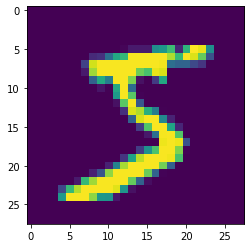

In [6]:
xTrain = np.asarray(trainImages, dtype = 'float')
xTest = np.asarray(testImages, dtype = 'float')

im = np.reshape(xTrain[0], (28, 28))
plt.imshow(im)

In [7]:
# rescale data so working with smaller values
xTrain /= 255.0
xTest /= 255.0

# add bias terms now, so dont have to later for the feed forward algo
xTrain  = np.concatenate((np.ones(60000)[:, np.newaxis], xTrain), axis=1)
xTrain = xTrain.T

xTest = np.concatenate((np.ones(10000)[:, np.newaxis], xTest), axis=1)
xTest = xTest.T

### 2) The algorithms (Feed forward, back propagation, sigmoid, etc.)

In [8]:
# initalizae weights based on s2 given
def initilizeWeights(s2):
    params = {
        'w1': (-sys.float_info.epsilon) +  math.sqrt(sys.float_info.epsilon) * np.random.randn(s2, 785),
        'w2': (-sys.float_info.epsilon) +  math.sqrt(sys.float_info.epsilon) * np.random.randn(10, s2 + 1)
    }

    return params

In [9]:
def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z))

def sigDerivatve(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [10]:
'''
Brief : Feed forward algorithm
Params:
    x = data
    weights = weights
    length = size of the data
'''
def feedForward(x, weights, length):
    
    # bias term already added before passing
    a1 = x
    z2 = np.matmul(weights['w1'], a1)
    
    a2 = sigmoid(z2)
    # add bias term
    a2 = a2.T
    a2 = np.concatenate((np.ones(length)[:, np.newaxis], a2), axis=1)
    a2 = a2.T
    
    z3 = np.matmul(weights['w2'], a2)
    
    # no bias term 
    a3 = sigmoid(z3)

    cache = {
        'a1': a1,
        'a2': a2,
        'a3' : a3,
        'z2': z2,
        'z3' : z3 
    }
    
    return cache

In [11]:
'''
Brief: Back propagation
Params:
    cache = cache of activation units and signals caculated 
                from feed forward algo
    expected = expected output
    weights = weights
    length = size of the data
'''
def backPropgation(cache, expected, weights, length):
    
    error3 = cache['a3'] - expected
    
    # gradient
    dw2 = (1 / length) * np.matmul(error3, cache['a2'].T)
    
    de2 = np.matmul(weights['w2'].T, error3)
    error2 = de2[1: , : ] * sigDerivatve(cache['z2'])
    
    #gradient
    dw1 = (1 / length) * np.matmul(error2, cache['a1'].T)
    
    params = {
        'error3': error3,
        'error2': error2,
        'gw1' : dw1,
        'gw2' : dw2
    }
    
    return params

In [12]:
'''
Brief: Calculates the accuracy
'''
def calcAcc(predicted, label):
    total = label.shape[0]
    correct = 0

    for i in range(total):
        if pred[i] == label[i]:
            correct += 1

    return correct/total

### 3) Gradient Descent

In [13]:
rnd.seed(56)

In [14]:
'''
Brief: Gradient Descent algorithm, uses feed forward and back propgation
'''
def gradDescent(steps, data, expectedResult, s2, learningRate):
    weights = initilizeWeights(s2)
    size = data.shape[1]
    
    for i in range(steps):        
        # push all nodes at once instead of one by one (makes calculating gradients easier)
        output = feedForward(data, weights, size)
        deriv = backPropgation(output, expectedResult, weights, size)
        
        weights['w2'] = weights['w2']  - learningRate * deriv['gw2']
        weights['w1'] = weights['w1']  - learningRate * deriv['gw1']
    
    return weights

### 3) Testing network with testing set

#### Learning rate of 0.1

In [15]:
w = gradDescent(1000, xTrain, yTrain, 30, 0.1)

In [16]:
result = feedForward(xTest, w, 10000)

In [17]:
# choose the label with highest activation value
pred = np.argmax(result['a3'], axis=0) 
accuracy = calcAcc(pred, testLabels)
print('Learning Rate: 0.1, Accuracy: ', accuracy)

Learning Rate: 0.1, Accuracy:  0.1135


#### Learning rate of 0.15

In [18]:
w = gradDescent(1000, xTrain, yTrain, 30, 0.15)

In [19]:
result = feedForward(xTest, w, 10000)

In [20]:
pred = np.argmax(result['a3'], axis=0) 
accuracy = calcAcc(pred, testLabels)
print('Learning Rate: 0.15, Accuracy: ', accuracy)

Learning Rate: 0.15, Accuracy:  0.4188


#### Learning rate of 0.3

In [21]:
w = gradDescent(1000, xTrain, yTrain, 30, 0.3)

In [22]:
result = feedForward(xTest, w, 10000)

In [23]:
pred = np.argmax(result['a3'], axis=0) 
accuracy = calcAcc(pred, testLabels)
print('Learning Rate: 0.3, Accuracy: ', accuracy)

Learning Rate: 0.3, Accuracy:  0.8922


#### Final Weights

In [24]:
w['w1']

array([[-1.95061656e-01,  4.60720262e-09, -8.63821419e-09, ...,
        -2.03686956e-08,  1.84180640e-08,  1.15662999e-08],
       [-1.12076528e-01,  5.69013255e-09,  2.25581777e-08, ...,
        -1.17255244e-08, -5.22986379e-09, -2.31224339e-08],
       [-1.20400195e-01, -4.27950405e-11, -2.01152986e-08, ...,
        -1.35241039e-08,  1.44825940e-08, -4.12006402e-09],
       ...,
       [-4.71147282e-02, -1.53403998e-08, -3.58393951e-08, ...,
        -7.70038850e-09,  1.22154735e-08,  4.45906078e-09],
       [-4.44081176e-02, -1.21804362e-08,  1.78917402e-08, ...,
         1.63953141e-08, -1.18696033e-08, -1.17237970e-08],
       [-2.21758212e-01,  6.35335477e-09, -5.18295484e-09, ...,
         8.55982997e-09, -8.97825565e-09, -3.20754447e-08]])

In [25]:
w['w2']

array([[-5.90718392e-01, -1.48400945e+00,  8.17184662e-02,
        -1.09049848e+00, -1.29492405e+00, -1.18988260e+00,
        -8.91759431e-01, -1.48717004e+00,  1.93822707e-01,
        -1.12509493e+00,  1.48374711e-01, -9.87762138e-01,
        -9.68894812e-01,  7.17260597e-01, -9.67404250e-01,
         5.01550420e-01,  8.49615104e-02, -7.73087430e-01,
         7.55301279e-01,  1.70659631e-01,  5.42615731e-01,
         2.51135110e-01,  3.97559693e-01, -1.61316206e+00,
         4.15255425e-01, -8.31678763e-01, -1.04225512e+00,
         7.33433891e-01,  4.92050184e-02, -1.04217621e+00,
         4.06155712e-01],
       [-6.91920290e-01,  5.63307839e-01, -7.67295062e-01,
         1.10577026e+00,  1.79018218e-01,  1.78854636e-01,
         6.91433410e-01,  3.75495440e-01,  7.16475913e-02,
         1.67085488e-01, -1.46975595e+00, -4.94413034e-01,
         9.14007629e-01, -9.81324737e-01,  4.16414791e-01,
        -6.86509413e-01, -1.25283022e+00,  1.65406897e+00,
        -7.17247028e-01, -9.18

### Different sizes for hidden layer

#### 100 Hidden units

In [26]:
w = gradDescent(1000, xTrain, yTrain, 100, 0.3)

In [27]:
result = feedForward(xTest, w, 10000)

In [28]:
pred = np.argmax(result['a3'], axis=0) 
accuracy = calcAcc(pred, testLabels)
print('Hidden layer size: 100, Accuracy: ', accuracy)

Hidden layer size: 100, Accuracy:  0.8987


#### 300 Hidden units

In [29]:
w = gradDescent(1000, xTrain, yTrain, 300, 0.3)

In [30]:
result = feedForward(xTest, w, 10000)

In [31]:
pred = np.argmax(result['a3'], axis=0) 
accuracy = calcAcc(pred, testLabels)
print('Hidden layer size: 300, Accuracy: ', accuracy)

Hidden layer size: 300, Accuracy:  0.8951


#### 20 hidden units

In [32]:
w = gradDescent(1000, xTrain, yTrain, 20, 0.3)

In [33]:
result = feedForward(xTest, w, 10000)

In [34]:
pred = np.argmax(result['a3'], axis=0) 
accuracy = calcAcc(pred, testLabels)
print('Hidden layer size: 20, Accuracy: ', accuracy)

Hidden layer size: 20, Accuracy:  0.8786
